<h1 style='text-align:center'>Predicting the probability of heart disease: A study based on personal keys<h1>

## Table of Contents
* [Introduction](#chapter1)
    * [Where is this data set coming from?](#section_1_1)
    * [Dataset Link](#section_1_2)
* [Objective](#chapter2)
* [Import Libraries & Data Collection](#chapter3)
* [Split Data](#chapter4)    
* [Data Exploration](#chapter5)    
    * [Missing Data](#section_5_1)
    * [Explanation of column name](#section_5_2)
    * [Numerical Features Analysis](#section_5_3)
    * [Categorical Features Analysis](#section_5_4)
* [Data Preparation](#chapter6)    
    * [Remove Outliers](#section_6_1)
    * [Transform Numerical Data](#section_6_2)
    * [Transform Categorical Data](#section_6_3)
* [Model Train & Select](#chapter7)                    
    * [Cross-Validation on Selected model](#section_8_1)
    * [Tune Hyperparameters for Model](#section_8_2)
* [Model Save](#chapter9)                

## Introduction  <a class="anchor" id="chapter1"></a>
<p>According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.</p>

#### Where is this data set coming from? <a class="anchor" id="section_1_1"></a>
<p>Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. As the CDC describes: "Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.". The most recent dataset (as of February 15, 2022) includes data from 2020. It consists of 401,958 rows and 279 columns. The vast majority of columns are questions asked to respondents about their health status, such as "Do you have serious difficulty walking or climbing stairs?" or "Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]".</p>

#### Dataset link <a class="anchor" id="section_1_2"></a> 
<a href='https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease'>https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease</a>


## Objective <a class="anchor" id="chapter2"></a> 

<p>To build a system using machine learning where any user gets the probabilities for heart disease itself by providing their personal keys.</p>

## Import Libraries & Data Collection  <a class="anchor" id="chapter3"></a>


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, KBinsDiscretizer, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
# import xgboost as x

In [5]:
data = pd.read_csv('heart_2020_cleaned.csv')
print(f'This dataset have {data.shape[1]} columns\nand {data.shape[0]} rows')

This dataset have 18 columns
and 319795 rows


In [6]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

<a class="anchor" id="chapter4"></a> <h2 style='text-align: center'>Split Data</h2>

In [8]:
# Remove duplicates from dataset
data = data.drop_duplicates()

Let's dataset split train, validation, and test set.

In [164]:
print(f"\nBefore split: {data.shape}")

train, test = train_test_split(data, test_size = 0.2, stratify=data["HeartDisease"])

print(f"\nAfter split train: {train.shape}")
print(f"\nAfter split test: {test.shape}")

print("\n\nNow, let's split the train set into train and validation.")
train, validation = train_test_split(train, test_size = 0.2)
print(f"\nAfter split train: {train.shape}")
print(f"\nAfter split validation: {validation.shape}")


Before split: (301717, 18)

After split train: (241373, 18)

After split test: (60344, 18)


Now, let's split the train set into train and validation.

After split train: (193098, 18)

After split validation: (48275, 18)


<a class="anchor" id="chapter5"></a>  <h2 style='text-align: center'>Data Exploration</h2> 

#### Missing Data <a class="anchor" id="section_5_1"></a>

In [11]:
print('The number of data that are missing from the dataset:',data.isnull().sum().sum())

The number of data that are missing from the dataset: 0


#### Explanation of column name <a class="anchor" id="section_5_2"></a>

1. HeartDisease : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
2. BMI : Body Mass Index (BMI).
3. Smoking : Have you smoked at least 100 cigarettes in your entire life? ( The answer Yes or No ).
4. AlcoholDrinking : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
5. Stroke : (Ever told) (you had) a stroke?
6. PhysicalHealth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
7. MentalHealth : Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
8. DiffWalking : Do you have serious difficulty walking or climbing stairs?
9. Sex : Are you male or female?
10. AgeCategory: Fourteen-level age category.
11. Race : Imputed race/ethnicity value.
12. Diabetic : (Ever told) (you had) diabetes?
13. PhysicalActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
14. GenHealth : Would you say that in general your health is...
15. SleepTime : On average, how many hours of sleep do you get in a 24-hour period?
16. Asthma : (Ever told) (you had) asthma?
17. KidneyDisease : Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
18. SkinCancer : (Ever told) (you had) skin cancer?

Number of each unique values in columns.

In [12]:
train.nunique()

HeartDisease           2
BMI                 3283
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

#### Numerical Features Analysis.  <a class="anchor" id="section_5_3"></a>

In [13]:
train.describe()[1:].T.style.background_gradient(cmap='YlOrRd', axis=None)

,mean,std,min,25%,50%,75%,max
BMI,28.462609,6.473677,12.020000,24.030000,27.410000,31.660000,93.970000
PhysicalHealth,3.570146,8.141912,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,4.121275,8.134241,0.000000,0.000000,0.000000,4.000000,30.000000
SleepTime,7.082937,1.466878,1.000000,6.000000,7.000000,8.000000,24.000000


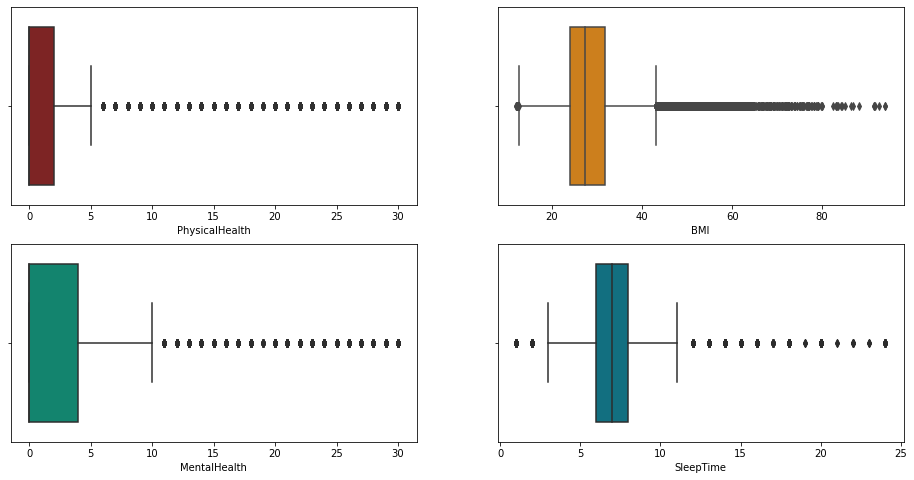

In [54]:
f, axes = plt.subplots(2, 2, figsize=(16,8))
sns.boxplot(x=train["PhysicalHealth"],  ax=axes[0,0], palette=["#8c1515"])
sns.boxplot(x=train["BMI"],   ax=axes[0,1], palette=["#E98300"])
sns.boxplot(x=train["MentalHealth"],   ax=axes[1,0], palette=["#009779"])
sns.boxplot(x=train["SleepTime"],   ax=axes[1,1], palette=["#007C92"])
plt.show()

Distribution of Numerical Features

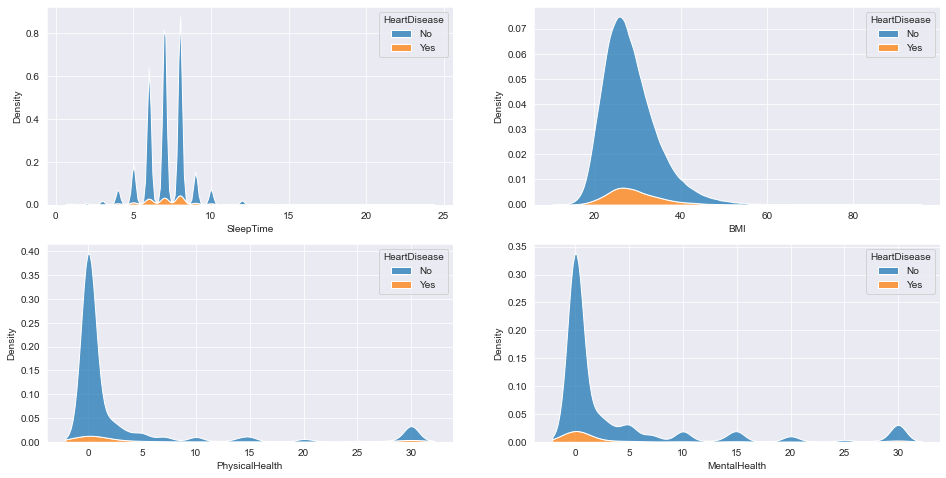

In [123]:
names = ['SleepTime', 'BMI', 'PhysicalHealth', 'MentalHealth']

fig, axes = plt.subplots(2, 2, figsize=(16,8))

for i,t in zip(names, axes.flatten()):
    sns.kdeplot(x=i, data=train, ax=t, multiple="stack",hue="HeartDisease")
    
plt.show()

#### Categorical Features Analysis.  <a class="anchor" id="section_5_4"></a>

In [113]:
for c, i in enumerate(train.select_dtypes(exclude=['float64'])):    
    color = '\u001b[48;5;254m' if c%2 != 0 else '\u001b[37;m'
    s = color+'\u001b[30;1m'+str(i) + '\t'
    for j in range(len(train[i].value_counts().keys())):                
        s = s +' \u001b[34;1m'+ str(train[i].value_counts().keys()[j]) +': \u001b[35;1m'+ str(round(train[i].value_counts(normalize=True)[j]*100)) + '%'
    print(s)
            

HeartDisease	 No: 91% Yes: 9%
Smoking	 No: 58% Yes: 42%
AlcoholDrinking	 No: 93% Yes: 7%
Stroke	 No: 96% Yes: 4%
DiffWalking	 No: 85% Yes: 15%
Sex	 Female: 53% Male: 47%
AgeCategory	 65-69: 10% 60-64: 10% 70-74: 10% 55-59: 9% 50-54: 8% 80 or older: 8% 75-79: 7% 45-49: 7% 40-44: 7% 18-24: 7% 35-39: 6% 30-34: 6% 25-29: 5%
Race	 White: 76% Hispanic: 9% Black: 8% Other: 4% Asian: 3% American Indian/Alaskan Native: 2%
Diabetic	 No: 83% Yes: 14% No, borderline diabetes: 2% Yes (during pregnancy): 1%
PhysicalActivity	 Yes: 76% No: 24%
GenHealth	 Very good: 35% Good: 30% Excellent: 20% Fair: 12% Poor: 4%
Asthma	 No: 86% Yes: 14%
KidneyDisease	 No: 96% Yes: 4%
SkinCancer	 No: 90% Yes: 10%


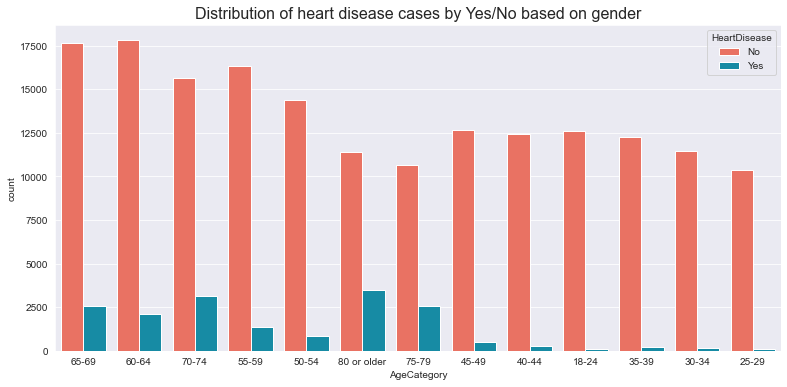

In [154]:
plt.figure(figsize = (13,6))
sns.countplot(x = 'AgeCategory', hue = 'HeartDisease', data = train, order = train['AgeCategory'].value_counts().index, palette = ["#FF604D","#009ABB"])
plt.title('Distribution of heart disease cases by Yes/No based on gender', fontsize=16)
plt.show()

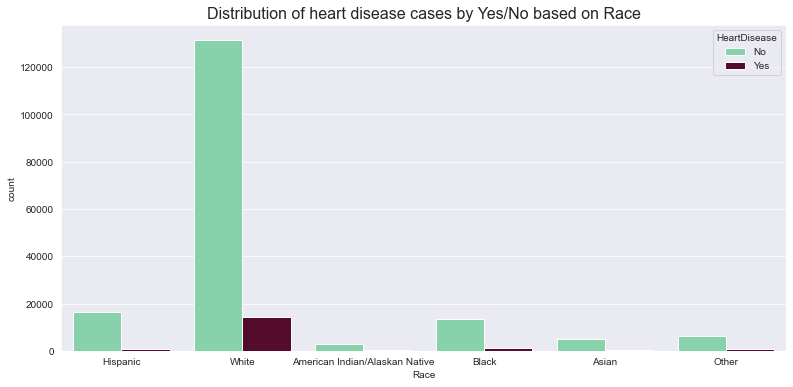

In [157]:
plt.figure(figsize = (13,6))
sns.countplot(x = 'Race', hue = 'HeartDisease', data = train, palette = ["#7ADFA9","#5E0229"])
plt.title('Distribution of heart disease cases by Yes/No based on Race', fontsize=16)
plt.show()

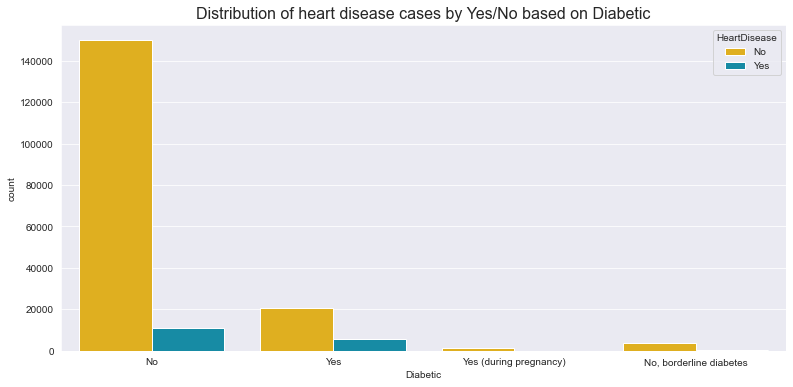

In [160]:
plt.figure(figsize = (13,6))
sns.countplot(x = 'Diabetic', hue = 'HeartDisease', data = train, palette = ["#FFBF00","#009ABB"])
plt.title('Distribution of heart disease cases by Yes/No based on Diabetic', fontsize=16)
plt.show()

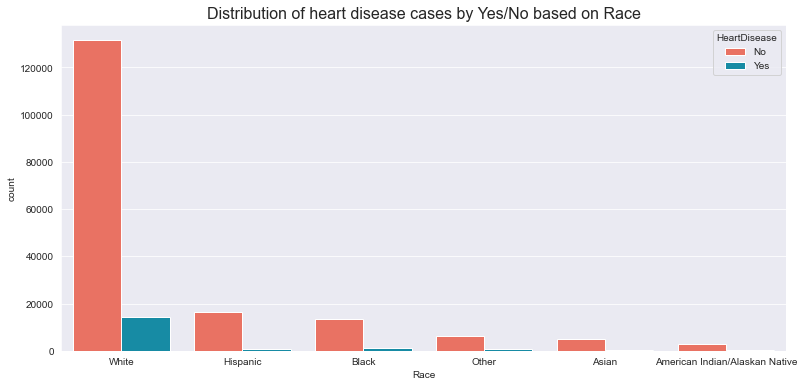

In [176]:
plt.figure(figsize = (13,6))
sns.countplot(x = 'Race', hue = 'HeartDisease', data = train, palette = ["#FF604D","#009ABB"])
plt.title('Distribution of heart disease cases by Yes/No based on Race', fontsize=16)
plt.show()

In [210]:
labels = [i for i in train.select_dtypes(exclude=['float64']) if len(train[i].value_counts().keys()) <= 2]
labels

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'PhysicalActivity',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

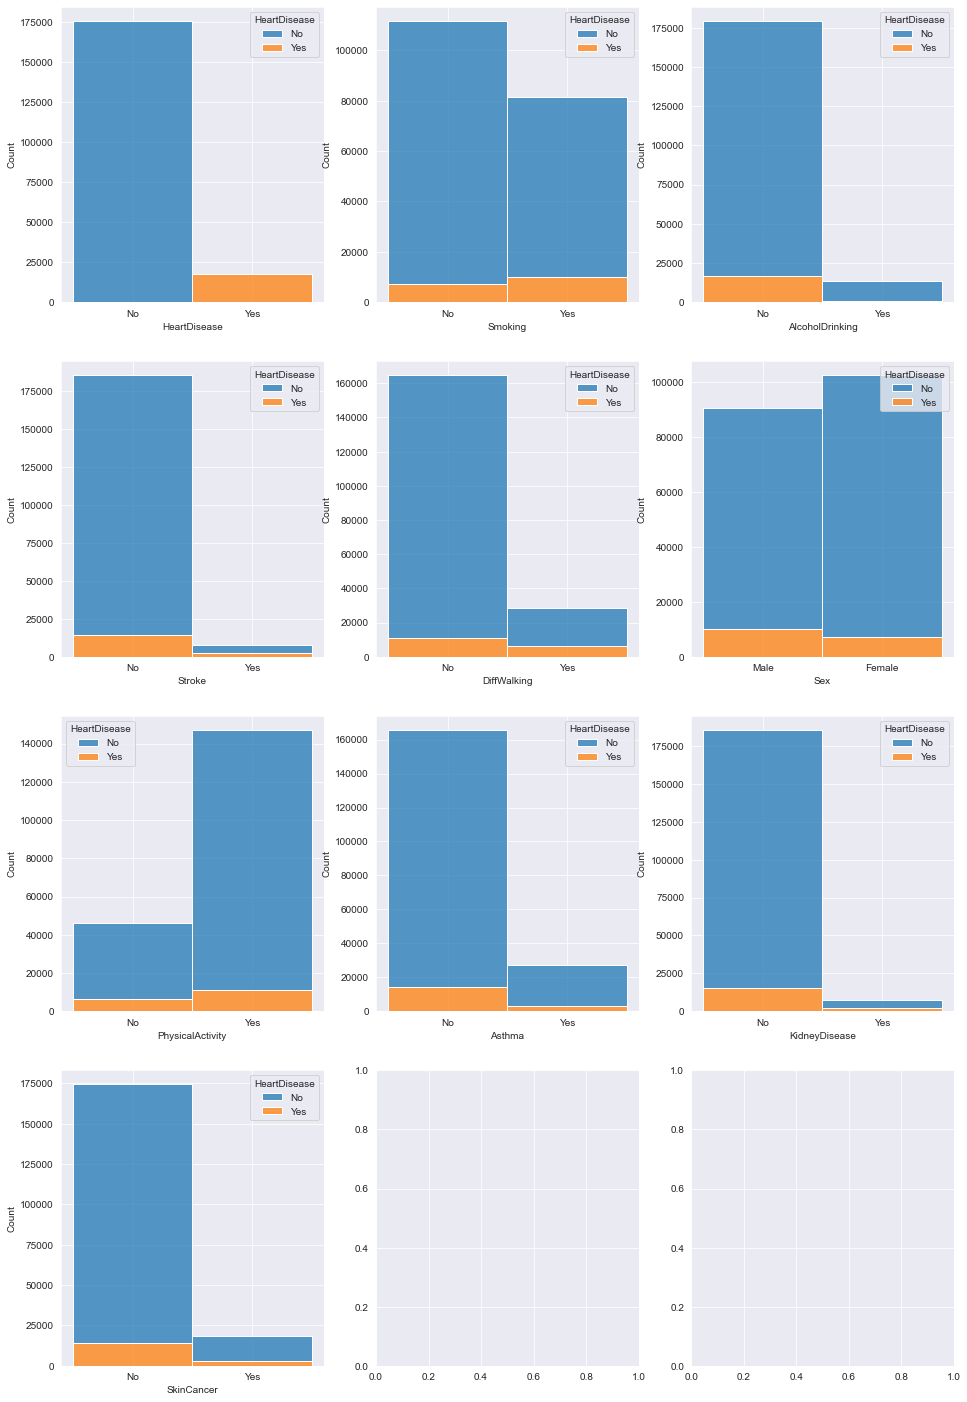

In [261]:
fig, axes = plt.subplots(4,3, figsize=(16, 25))

for i,t in zip(labels, axes.flatten()):
    sns.histplot(x=i, data=train, ax=t, hue="HeartDisease", multiple="stack")
    
plt.show()

<a class="anchor" id="chapter6"></a>  <h2 style='text-align: center'>Data Preparation</h2> 

#### Remove Outliers <a class="anchor" id="section_6_1"></a>

In [29]:
def remove_outliers(data):
    df = data.copy()
    # BMI 
#     lower_limit = abs(df.BMI.mean() - 2* df.BMI.std())
#     upper_limit = abs(df.BMI.mean() + 2 * df.BMI.std())
#     df = df[(df.BMI >= lower_limit) & (df.BMI < upper_limit)]
    
    # PHysical Health         
    upper_limit = abs(df.PhysicalHealth.mean() +  2 * df.PhysicalHealth.std())
    df = df[(df.PhysicalHealth >= 0) & (df.PhysicalHealth <= upper_limit)]
    
    # Mental Health         
    upper_limit = abs(df.MentalHealth.mean() +  2 * df.MentalHealth.std())
    df = df[(df.MentalHealth >= 0) & (df.MentalHealth <= upper_limit)]
    
#     # Sleep TIme
#     lower_limit = abs(df.SleepTime.mean() - 3 * df.SleepTime.std())
#     upper_limit = abs(df.SleepTime.mean() + 3 * df.SleepTime.std())
#     df = df[(df.SleepTime > lower_limit) & (df.SleepTime <= upper_limit)]
    return df

#### Transform Numerical Data <a class="anchor" id="section_6_2"></a>

In [30]:
def trainform_numerical_data(data):
    df = data.copy()
    est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
    scaler = StandardScaler()

    for i in df.select_dtypes(include=['float64']):    
        df[i] = est.fit_transform(df[i].values.reshape(-1, 1)).astype('int64')
    return df

#### Transform Categorical Data <a class="anchor" id="section_6_3"></a>

In [31]:
def trainform_categorical_data(data):
    df = data.copy()
    for i in list(df.select_dtypes(include=['object']).columns):
        le = LabelEncoder()
        df[i] =  le.fit_transform(df[i]).astype('int64')
    
    more_two_cols = ['AgeCategory', 'Race', 'Diabetic']  
    df = pd.get_dummies(df, columns=more_two_cols, drop_first=True)
    return df

In [32]:
def data_preparation(data_frame):        
    df = 0
    df = data_frame.copy()

    # remove outliers
    df = remove_outliers(df)
    
    # Transform numarical data
    df = trainform_numerical_data(df)
    # Transform categorical data
    df = trainform_categorical_data(df)    
            
    return df

let's make prepare data for ML model.

In [33]:
data = data_preparation(data)
train = data_preparation(train)
test = data_preparation(test)
validation = data_preparation(validation)

In [34]:
X, y = data.loc[:, data.columns != 'HeartDisease'], data['HeartDisease']

X_train, y_train = train.loc[:, train.columns != 'HeartDisease'], train['HeartDisease']
X_test, y_test = test.loc[:, test.columns != 'HeartDisease'], test['HeartDisease']
X_val, y_val = validation.loc[:, validation.columns != 'HeartDisease'], validation['HeartDisease']

 <a class="anchor" id="chapter7"></a>  <h2 style='text-align: center'>Model Train & Select</h2> 

In [35]:
def model_pipe(model, x, y, x_test, y_test):
    
    pipeline = Pipeline(steps = [            
#             ('selector', SelectKBest(chi2, k=34)),
            ('classifier', model)              
           ])

    model = pipeline.fit(x, y)
    return model.score(x_test, y_test)    

Select five models for training 

In [37]:
pipelines = []
pipelines.append(('Gradient Boosting Classifier' , (Pipeline([('scaled' , StandardScaler()),('GBC' ,GradientBoostingClassifier())]))))
# pipelines.append(('Extreme Gradient Boosting Classifier' , (Pipeline([('scaled' , StandardScaler()),('GBC' ,x.XGBClassifier())]))))
pipelines.append(('Random Forest Classifier' , (Pipeline([('scaled' , StandardScaler()),('RFC' ,RandomForestClassifier())]))))
pipelines.append(('Logistic Regression' , (Pipeline([('scaled' , StandardScaler()),('LR' ,LogisticRegression())]))))
pipelines.append(('Decision Tree Classifier' , (Pipeline([('scaled' , StandardScaler()),('DTC' ,DecisionTreeClassifier())]))))

In [38]:
model_name = []
results = []
print('Test On validation set\n')
for pipe ,model in pipelines:       
    print("{}: {:.2f}".format(pipe, model_pipe(model, X_train, y_train, X_val, y_val)*100))

Test On validation set

Gradient Boosting Classifier: 92.12
Random Forest Classifier: 91.26
Logistic Regression: 92.10
Decision Tree Classifier: 89.96


In [ ]:
model_name = []
results = []
print('Test on test set\n')
for pipe ,model in pipelines:       
    print("{}: {:.2f}".format(pipe, model_pipe(model, X_train, y_train, X_test, y_test)*100))

#### Cross-Validation on Selected model <a class="anchor" id="section_8_1"></a>

In [42]:
cv_results = {}
for pipe ,model in pipelines: 
    cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
    cv_results[pipe] = cross_val_score(model, X, y, cv=cv, scoring=('accuracy')) * 100

In [43]:
pd.DataFrame(cv_results)

,Gradient Boosting Classifier,Random Forest Classifier,Logistic Regression,Decision Tree Classifier
0,92.295619,91.526425,92.217923,90.384287
1,92.329806,91.501562,92.309605,90.463537
2,92.301835,91.510885,92.241232,90.468199
3,92.340564,91.499876,92.309485,90.342181
4,92.336022,91.602567,92.273864,90.455767
5,92.283188,91.537302,92.221031,90.381179
6,92.362438,91.476699,92.339129,90.451106
7,92.345226,91.534063,92.261313,90.315763
8,92.306497,91.445620,92.269203,90.407596
9,92.348453,91.492238,92.284742,90.367193


#### Tune Hyperparameters for Model <a class="anchor" id="section_8_2"></a>

In [44]:
parameters = {
    "n_estimators":[50,250,32],
    "max_depth":[1,3],
    "learning_rate":[0.01,0.1,1,10]
}

gbc = GradientBoostingClassifier()

In [45]:
cv = GridSearchCV(gbc,parameters,cv=2)
cv.fit(X,y)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'max_depth': [1, 3], 'n_estimators': [50, 250, 32]})

In [46]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [47]:
display(cv)

Best parameters are: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}


0.923 + or -0.0 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.923 + or -0.0 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.923 + or -0.0 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 32}
0.923 + or -0.0 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.923 + or -0.0 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.923 + or -0.0 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 32}
0.923 + or -0.0 for the {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50}
0.923 + or -0.0 for the {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 250}
0.923 + or -0.0 for the {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 32}
0.923 + or -0.0 for the {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
0.923 + or -0.0 for the {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators':

In [48]:
cv.score(X_test, y_test) * 100

92.40525938692124

Probability predictions

In [64]:
y_pred = cv.predict_proba(X_test)

In [65]:
pd.DataFrame(y_pred[:15]*100)

,0,1
0,98.069637,1.930363
1,96.788162,3.211838
2,97.960704,2.039296
3,95.346176,4.653824
4,91.523677,8.476323
5,88.109353,11.890647
6,69.704825,30.295175
7,88.393063,11.606937
8,94.630820,5.369180
9,95.837126,4.162874


In [66]:
y_test.head(15)

96327     0
257121    0
252261    0
298148    0
228875    0
144214    0
107034    1
49574     1
87335     0
51309     0
23863     0
231115    0
45641     0
288322    0
123165    0
Name: HeartDisease, dtype: int64

<a class="anchor" id="chapter9"></a>  <h2 style='text-align: center'>Model Save</h2> 

In [262]:
import pickle

In [263]:
filename = 'heart_disease_model.sav'
pickle.dump(cv, open(filename, 'wb'))

NameError: name 'cv' is not defined

Model Load

In [264]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

FileNotFoundError: [Errno 2] No such file or directory: 'heart_disease_model.sav'

In [84]:
pred = loaded_model.predict_proba(X_test[:1])

In [108]:
pred

array([[0.98069637, 0.01930363]])